In [1]:
import sys
import matplotlib
import matplotlib.pyplot as plt

from mrlattice.lattice.generate import *
from mrlattice.lattice.validate import *

In [2]:
# this notebook requires mrlattice version:
VERSION = "0.1.5"

In [3]:
%run prepare_notebook.ipynb

The following names are now available:

<class '__main__.LatticeArrayPlotWidget'>
<class '__main__.SuperimposeLatticeArrayPlotWidget'>


In [4]:
%run 0.1.5-01_configuration_loops.ipynb
clear_output()

In [5]:
print(NewValidateLattice)

<class '__main__.NewValidateLattice'>


In [6]:
# interactive plots in notebook
# %matplotlib notebook
# open external window with plot
# %matplotlib qt
# for saving widget state
%matplotlib inline

if "inline" in matplotlib.get_backend():
    plt.rcParams["figure.figsize"] = (14, 14)
else:
    plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

# Summary

We present 4 tests for lattice array regions and demonstrate how to use them.


# Validation of Regions

We now present 4 validation tests for the general spatial layout of lattices. First we want to make sure, that the spatial width of all time slices is the same so that each cell has 2 temporal neighbors (except the first and last time slices). The second test validates that the lattice doesn't have any regions of zero spatial width, which could appear from faulty constructions. Similarly, the next test makes sure that there are no neighboring regions with the same resolution. In the simplest form of the lattice array those regions must be merged to one. The last test checks if neighboring regions' resolutions only differ by a factor of 2.

This time we use the `SuperimposeLatticeArray` in the examples, but all of the tests from this notebook are applicable for any `LatticeArray` type.

In [7]:
def test_spatial_width(lattice):
    """Test if all time slices have same spatial width."""
    
    # based on first time slice
    test_width = sum(r[1] * r[-1] for r in lattice.array[0])
    
    for t,ts in enumerate(lattice.array[1:]):
        cur_width = sum(area[1] * area[-1] for area in ts)
        
        if cur_width != test_width:
            raise ValidationError(
                f"Spatial width of time slice {t} differs from previous.",
                "test_spatial_width")

In [8]:
def test_zero_width(lattice):
    """Test for zero width regions."""
    
    for t,ts in enumerate(lattice.array):
        zero = list(filter(lambda r: r[-1]==0, ts))
        if zero:
            raise ValidationError(
                f"Time slice {t} contains regions with zero width: {zero}.",
                "test_zero_width")

In [9]:
def test_neighbor_merge(lattice):
    """Test if neighboring regions have same resolution."""
    
    for t,ts in enumerate(lattice.array):
        for r1, r2 in zip(ts[:-1], ts[1:]):
            if r1[1] == r2[1]:
                raise ValidationError(
                    f"Timse slice {t} contains two neighboring regions with "
                    f"the same resolution {r[1]}. They should me merged.",
                    "test_neighbor_merge")

In [10]:
def test_spatial_neighbors(lattice):
    """Test if spatial neighbors' resolution only differ by 2x."""
    
    for t,ts in enumerate(lattice.array):
        for r1, r2 in zip(ts[:-1], ts[1:]):
            if r1[1]/r2[1] not in [1/2, 1, 2]:
                raise ValidationError(
                    f"Time slice {t} contains two neighboring regions where "
                    "the resolutions differ by more than a factor of 2:\n"
                    f"reg 1: {r1}\treg 2: {r2}",
                    "test_spatial_neighbors")

## Fixed Width Scheme Test Lattice

In [11]:
FIXED_WIDTH_PROPS = {
    "scheme":"fixed_width",
    "coarse_steps":4,
    "borders_width":30,
    "buffer":3,
    "finest_width":16,
    "repeat":9,
}
fw_lattice = SuperimposeLatticeArray(**FIXED_WIDTH_PROPS)
fw_lattice.generate_array()
prop_sort = [
    "buffer",
    "coarse_steps",
    "borders_width",
    "finest_width",
    "repeat",
]
fw_valid = NewValidateLattice(fw_lattice, sorted_props=prop_sort)

SuperimposeLatticeArrayPlotWidget(children=(VBox(children=(HBox(children=(VBox(children=(Label(value='Number o…

Output()

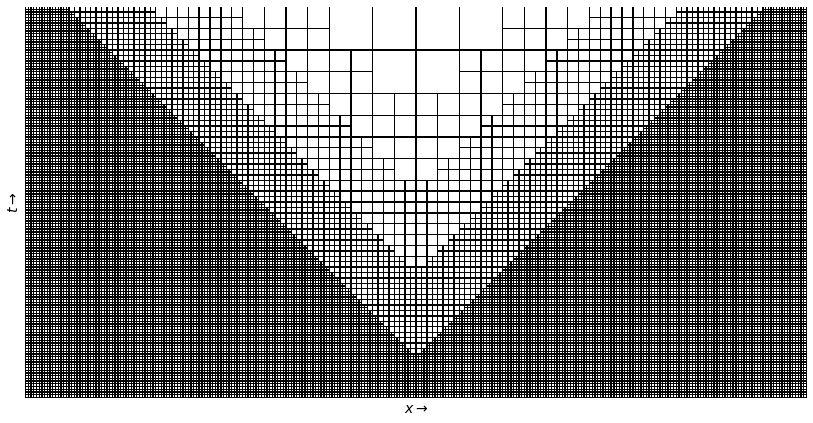

In [12]:
ww = SuperimposeLatticeArrayPlotWidget(lattice=fw_lattice)
ww.alpha_bg.value = True
ww._plot_button_on_click()
display(ww)

## Fixed Number Scheme Test Lattice

In [13]:
FIXED_NUMBER_PROPS = {
    "scheme":"fixed_number",
    "coarse_steps":4,
    "borders_width":8,
    "buffer":3,
    "finest_width":2,
    "repeat":10,
}
fn_lattice = SuperimposeLatticeArray(**FIXED_NUMBER_PROPS)
fn_lattice.generate_array()
prop_sort = [
    "buffer",
    "coarse_steps",
    "borders_width",
    "finest_width",
    "repeat",
]
fn_valid = NewValidateLattice(fn_lattice, sorted_props=prop_sort)

SuperimposeLatticeArrayPlotWidget(children=(VBox(children=(HBox(children=(VBox(children=(Label(value='Number o…

Output()

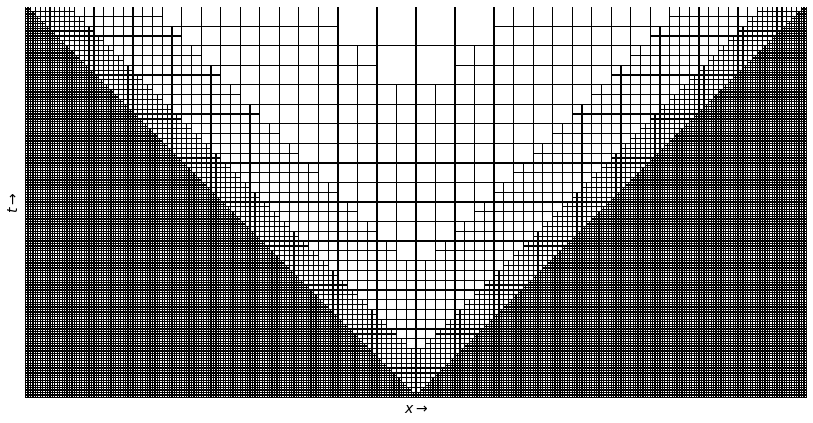

In [14]:
wn = SuperimposeLatticeArrayPlotWidget(lattice=fn_lattice)
wn.alpha_bg.value = True
wn._plot_button_on_click()
display(wn)

## Example Validation Test Execution

In [15]:
# fixed width scheme
fw_valid.add_test("spatial width", test_spatial_width)
fw_valid.add_test("zero width", test_zero_width)
fw_valid.add_test("neighbor merge", test_neighbor_merge)
fw_valid.add_test("neighbor resolution", test_spatial_neighbors)
fw_valid(stdout=sys.stdout)

neighbor_merge
Test if neighboring regions have same resolution. ... 
	PASSED.
neighbor_resolution
Test if spatial neighbors' resolution only differ by 2x. ... 
	PASSED.
spatial_width
Test if all time slices have same spatial width. ... 
	PASSED.
zero_width
Test for zero width regions. ... 
	PASSED.


----------------------------------------------------------------------
Ran 4 tests:
	4 passed

PASSED!


True

In [16]:
# fixed number scheme
fn_valid.add_test("spatial width", test_spatial_width)
fn_valid.add_test("zero width", test_zero_width)
fn_valid.add_test("neighbor merge", test_neighbor_merge)
fn_valid.add_test("neighbor resolution", test_spatial_neighbors)
fn_valid(stdout=sys.stdout)

neighbor_merge
Test if neighboring regions have same resolution. ... 
	PASSED.
neighbor_resolution
Test if spatial neighbors' resolution only differ by 2x. ... 
	PASSED.
spatial_width
Test if all time slices have same spatial width. ... 
	PASSED.
zero_width
Test for zero width regions. ... 
	PASSED.


----------------------------------------------------------------------
Ran 4 tests:
	4 passed

PASSED!


True